In [ ]:
import pandas as pd
from itertools import product
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive'

/content/drive/MyDrive


In [ ]:
data_files = [
    'yellow_tripdata_2023-01.parquet',
    'yellow_tripdata_2023-02.parquet',
    'yellow_tripdata_2023-03.parquet',
    'yellow_tripdata_2023-04.parquet',
]

dfs = []

for file in data_files:
    dfs.append(pd.read_parquet(f'./data/{file}', engine='pyarrow'))

df = pd.concat(dfs)
del dfs
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,NaN
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,NaN
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,NaN
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,NaN
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,NaN


# Data Cleaning

In [ ]:
df.isna().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count           326869
trip_distance                  0
RatecodeID                326869
store_and_fwd_flag        326869
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge      326869
airport_fee              9677714
Airport_fee              3321892
dtype: int64

In [ ]:
df.mode(dropna=False)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2.0,2023-02-03 18:43:00,2023-03-19,1.0,1.0,1.0,N,132.0,236.0,1.0,8.6,0.0,0.5,0.0,0.0,1.0,16.8,2.5,NaN,0.0
1,NaN,NaT,2023-04-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['passenger_count'].mean()

1.3625755596933322

In [ ]:
df['passenger_count'] = df['passenger_count'].fillna(1.0) # This is a driver-entered value

In [ ]:
df['passenger_count'].mean()

1.3532236169660903

In [ ]:
df['store_and_fwd_flag'].unique()

array(['N', 'Y', None], dtype=object)

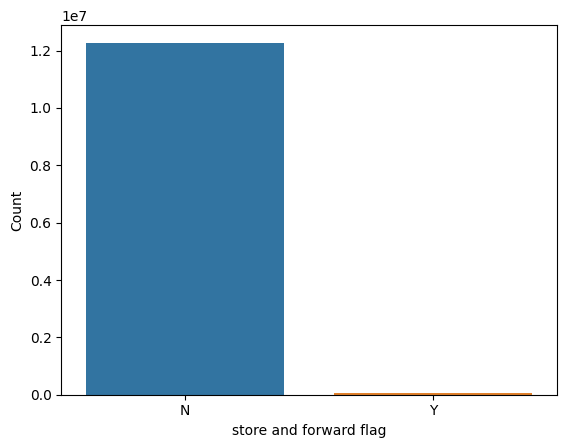

In [ ]:
sns.countplot(x='store_and_fwd_flag', data=df)
plt.xlabel('store and forward flag')
plt.ylabel('Count')
plt.show()

In [ ]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')

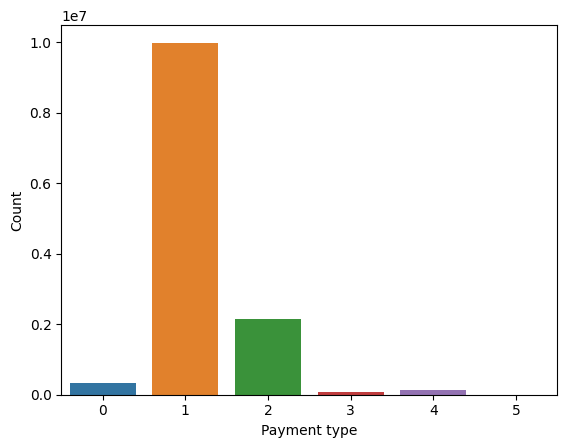

In [ ]:
sns.countplot(x='payment_type', data=df)
plt.xlabel('Payment type')
plt.ylabel('Count')
plt.show()

In [ ]:
df['fare_amount'].min()

-959.9

In [ ]:
df = df[df['fare_amount'] >= 0]

In [ ]:
df['tolls_amount'].min()

0.0

In [ ]:
df = df[df['tolls_amount'] >= 0]

In [ ]:
df['total_amount'].min()

-6.5

In [ ]:
df = df[df['total_amount'] >= 0]

In [ ]:
df = df[df['passenger_count'] <= 4]

In [ ]:
df = df.sort_values(['tpep_pickup_datetime'])

In [ ]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
count,1.228055e+07,1.228055e+07,1.228055e+07,1.195431e+07,1.228055e+07,1.228055e+07,1.228055e+07,1.228055e+07,1.228055e+07,1.228055e+07,1.228055e+07,1.228055e+07,1.228055e+07,1.228055e+07,1.195431e+07,2.899186e+06,9.055124e+06
mean,1.721288e+00,1.260565e+00,3.952686e+00,1.577218e+00,1.658576e+02,1.642413e+02,1.170680e+00,1.908416e+01,1.613021e+00,4.960316e-01,3.473023e+00,5.570850e-01,9.985653e-01,2.799689e+01,2.313468e+00,1.102753e-01,1.173455e-01
std,4.547974e-01,6.437495e-01,2.454849e+02,7.044571e+00,6.403999e+01,6.986542e+01,4.925838e-01,1.772517e+01,1.811219e+00,4.735774e-02,3.938738e+00,2.087675e+00,3.438776e-02,2.209917e+01,6.569136e-01,3.545188e-01,3.939148e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-2.500000e+00,-5.000000e-01,-5.780000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.070000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.573000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.800000e+00,0.000000e+00,1.000000e+00,2.052000e+01,2.500000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.390000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.120000e+01,2.500000e+00,5.000000e-01,4.280000e+00,0.000000e+00,1.000000e+00,2.951000e+01,2.500000e+00,0.000000e+00,0.000000e+00
max,6.000000e+00,4.000000e+00,3.350043e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,2.449500e+03,9.638000e+01,5.316000e+01,9.843000e+02,1.969900e+02,1.000000e+00,2.451000e+03,2.750000e+00,1.250000e+00,1.750000e+00


<ipython-input-46-77ce299b21a3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-46-77ce299b21a3>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

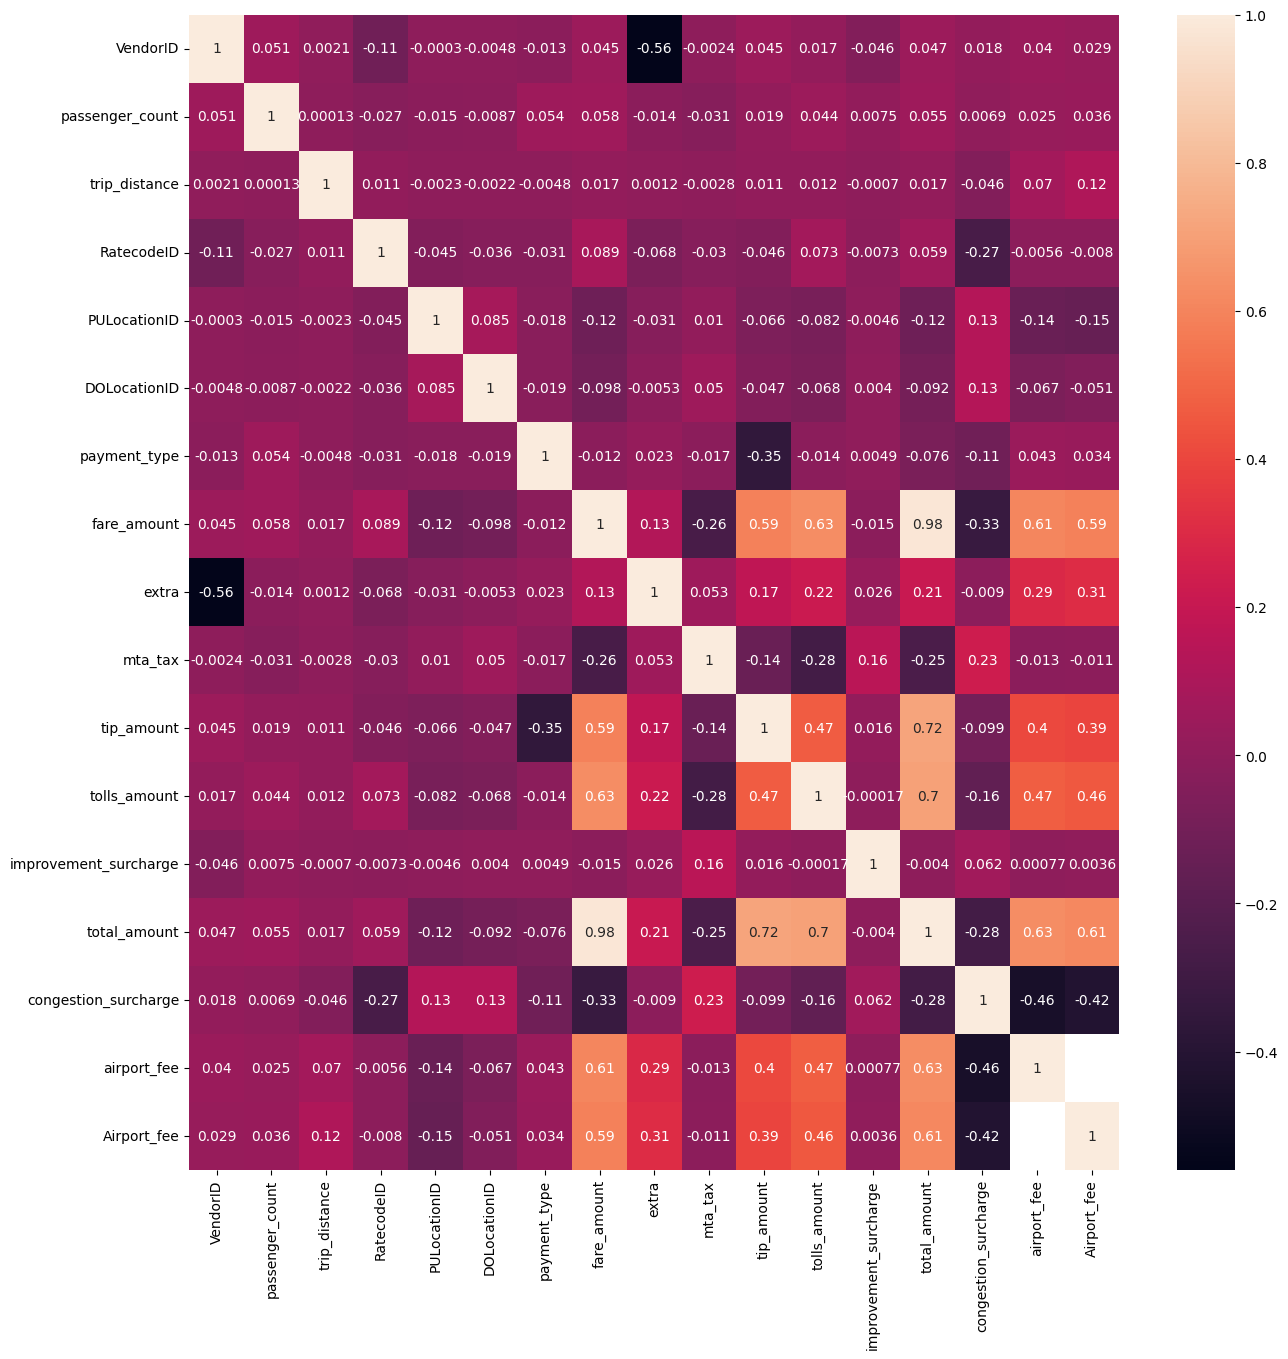

In [ ]:
# Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)